In [39]:
import networkx as nx
# https://networkx.github.io/documentation/stable/reference/index.html
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from collections import Counter

In [40]:
nx.__version__

'3.2.1'

# Exploration of the graph : relational data understanding

In [41]:
# load the graph
# The graph is an extraction from LinkedIn Social Network
G = nx.read_gexf("mediumLinkedin.gexf")

In [42]:
print(G)

Graph with 811 nodes and 1597 edges


In [43]:
G.number_of_nodes()

811

In [44]:
# Nb of edges
G.number_of_edges()

1597

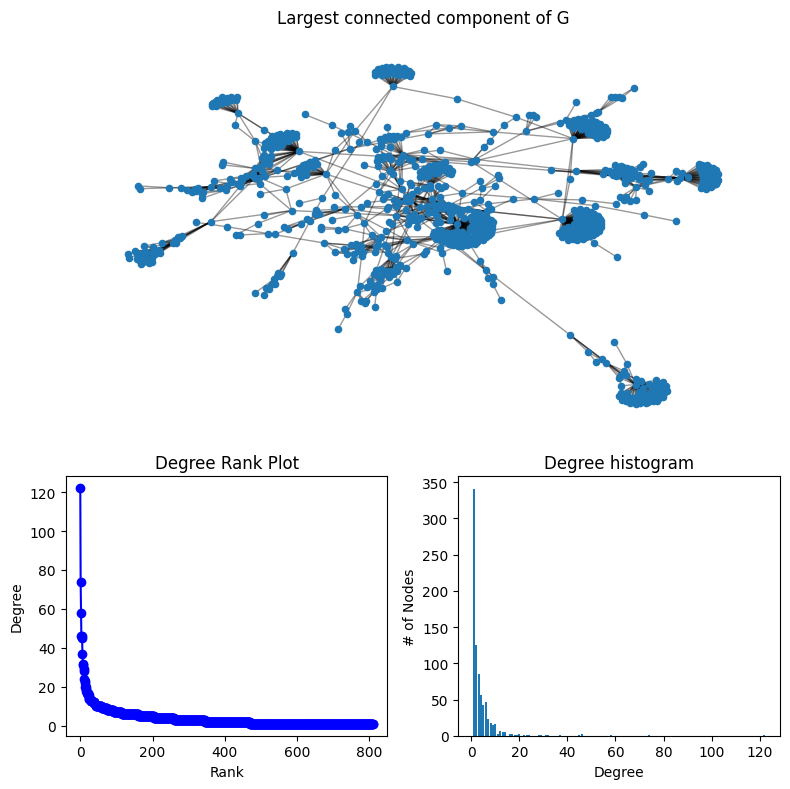

In [45]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Largest connected component of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

# Profil data understanding

In [46]:
df_loc = pd.read_csv("location_with_60percent_of_nodes_remoded.csv", sep='\t', header='infer')
df_emp = pd.read_csv("employer_with_60percent_of_nodes_remoded.csv", sep='\t', header='infer')
df_col = pd.read_csv("college_with_60percent_of_nodes_remoded.csv", sep='\t', header='infer')

df_merged = df_loc.merge(df_emp, on="name", how="outer")
df_merged = df_merged.merge(df_col, on="name", how="outer")

location_dict = dict(zip(df_merged['name'], df_merged['location']))
employer_dict = dict(zip(df_merged['name'], df_merged['employer']))
college_dict = dict(zip(df_merged['name'], df_merged['college']))

nx.set_node_attributes(G, location_dict, "location")
nx.set_node_attributes(G, employer_dict, "employer")
nx.set_node_attributes(G, college_dict, "college")

### Global Proportion

In [47]:
#Location

known_nodes = [n for n in G.nodes if G.nodes[n].get("location") is not None]
locations = [G.nodes[n]["location"] for n in known_nodes]
global_counts = Counter(locations)
total_known = len(locations)
global_proportions_location = {loc: count/total_known for loc, count in global_counts.items()}
print("Global proportions (location):", global_proportions_location)

#Employer

known_nodes = [n for n in G.nodes if G.nodes[n].get("employer") is not None]
employers = [G.nodes[n]["employer"] for n in known_nodes]
global_counts = Counter(employers)
total_known = len(employers)
global_proportions_employer = {emp: count/total_known for emp, count in global_counts.items()}
print("Global proportions (employer):", global_proportions_employer)

#College

known_nodes = [n for n in G.nodes if G.nodes[n].get("college") is not None]
colleges = [G.nodes[n]["college"] for n in known_nodes]
global_counts = Counter(colleges)
total_known = len(colleges)
global_proportions_college = {col: count/total_known for col, count in global_counts.items()}
print("Global proportions (college):", global_proportions_college)

Global proportions (location): {'norfolk virginia area': 0.002976190476190476, 'bologna area italy': 0.002976190476190476, 'urbana-champaign illinois area': 0.27380952380952384, 'greater seattle area': 0.017857142857142856, 'bengaluru area india': 0.005952380952380952, 'baltimore maryland area': 0.002976190476190476, 'greater boston area': 0.047619047619047616, 'bloomington normal illinois area': 0.008928571428571428, 'china': 0.026785714285714284, 'san francisco bay area': 0.07142857142857142, 'shanghai city china': 0.017857142857142856, 'greater chicago area': 0.09821428571428571, 'madison wisconsin area': 0.005952380952380952, 'washington d.c. metro area': 0.017857142857142856, 'greater minneapolis-st. paul area': 0.005952380952380952, 'saginaw michigan area': 0.002976190476190476, 'ithaca new york area': 0.005952380952380952, 'lincoln nebraska area': 0.002976190476190476, 'greater los angeles area': 0.011904761904761904, 'tulsa oklahoma area': 0.002976190476190476, 'columbia missou

## Now, your turn!

Modify the previous cells, create your own noes to explore the dataset, and go on with the challenge. You need to understand how attributes are spread avor the nodes, as your first intuition is that neighbors tend to be similar. As you know "Birds of a feather flock together" (homophily theory in social network analysis).

Test here the homophily in the graph for each attribute



=== LOCATION ===
Global proportions: {'norfolk virginia area': 0.002976190476190476, 'bologna area italy': 0.002976190476190476, 'urbana-champaign illinois area': 0.27380952380952384, 'greater seattle area': 0.017857142857142856, 'bengaluru area india': 0.005952380952380952, 'baltimore maryland area': 0.002976190476190476, 'greater boston area': 0.047619047619047616, 'bloomington normal illinois area': 0.008928571428571428, 'china': 0.026785714285714284, 'san francisco bay area': 0.07142857142857142, 'shanghai city china': 0.017857142857142856, 'greater chicago area': 0.09821428571428571, 'madison wisconsin area': 0.005952380952380952, 'washington d.c. metro area': 0.017857142857142856, 'greater minneapolis-st. paul area': 0.005952380952380952, 'saginaw michigan area': 0.002976190476190476, 'ithaca new york area': 0.005952380952380952, 'lincoln nebraska area': 0.002976190476190476, 'greater los angeles area': 0.011904761904761904, 'tulsa oklahoma area': 0.002976190476190476, 'columbia

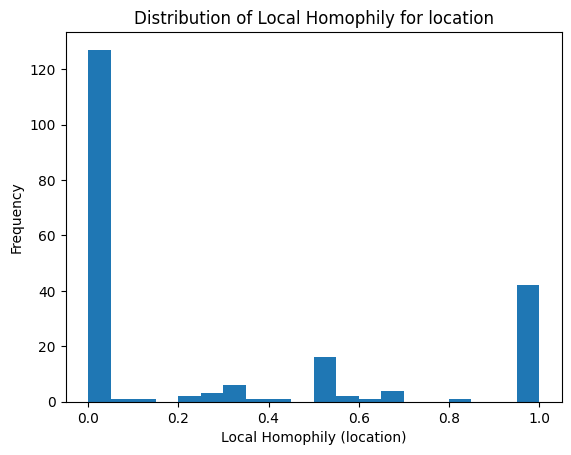


=== EMPLOYER ===
Global proportions: {'virgina state corrections': 0.002976190476190476, 'university of illinois at urbana-champaign': 0.07142857142857142, 'zhongrong international trust co. ltd': 0.002976190476190476, 'state farm insurance': 0.002976190476190476, 'toyota technical center': 0.002976190476190476, 'designing events': 0.002976190476190476, 'sweetser': 0.002976190476190476, 'google': 0.011904761904761904, nan: 0.11607142857142858, 'cv lloyde': 0.002976190476190476, 'ipea': 0.002976190476190476, 'pwc': 0.002976190476190476, 'information engineers and consultants bangladesh ltd.': 0.002976190476190476, 'izenesoft (shanghai) co. ltd': 0.002976190476190476, 'facebook': 0.002976190476190476, 'martin flory group': 0.002976190476190476, 'bangladesh insulation &amp; sanitary factory (bisf)': 0.002976190476190476, 'west virginia university': 0.002976190476190476, 'campus recreation': 0.002976190476190476, 'george mason university': 0.002976190476190476, 'plush horse ice cream parl

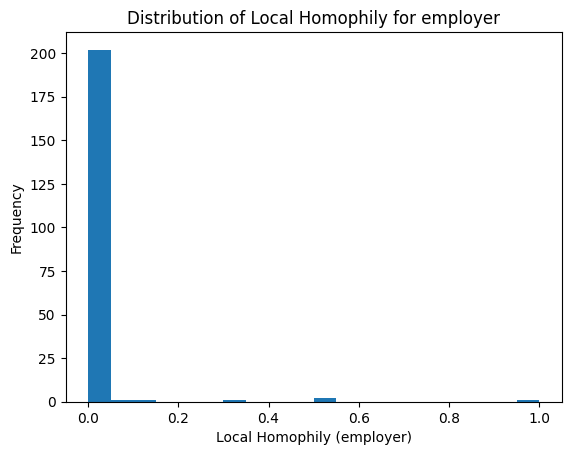


=== COLLEGE ===
Global proportions: {'longwood university': 0.002976190476190476, 'universit&#xe0; di bologna': 0.002976190476190476, 'shanghai university of finance and economics': 0.002976190476190476, 'university of illinois at urbana-champaign': 0.18154761904761904, 'indian institute of technology madras': 0.005952380952380952, nan: 0.31547619047619047, 'penn high school': 0.002976190476190476, 'shanghai jiao tong university': 0.047619047619047616, 'illinois wesleyan university': 0.008928571428571428, 'sao paulo state university (unesp) &quot;j&#xfa;lio de mesquita filho&quot;': 0.002976190476190476, 'bangladesh university of engineering and technology': 0.02976190476190476, 'northern illinois university': 0.002976190476190476, 'university of illinois at urbana-champaign - college of business': 0.005952380952380952, 'isfahan university of technology': 0.005952380952380952, 'university of west indies st. augustine campus': 0.002976190476190476, 'beijing language and culture univers

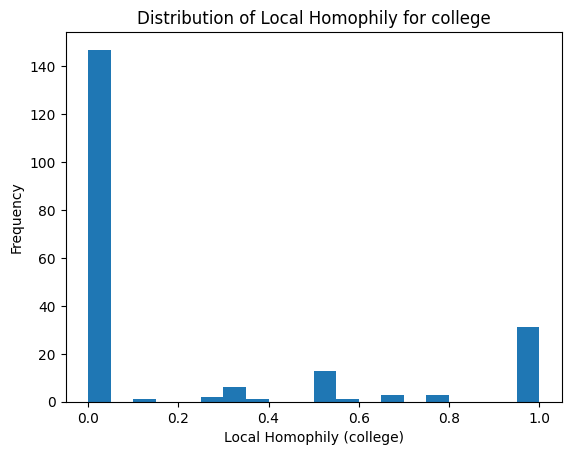

In [48]:
attributes = ['location', 'employer', 'college']

homophily_results = {}

for attr in attributes:
    print(f"\n=== {attr.upper()} ===")
    
    known_nodes = [n for n in G.nodes if G.nodes[n].get(attr) is not None]
    
    values = [G.nodes[n][attr] for n in known_nodes]
    global_counts = Counter(values)
    total_known = len(values)
    global_proportions = {v: count/total_known for v, count in global_counts.items()}
    print("Global proportions:", global_proportions)
    
    H_values = []
    expected_values = []
    
    for node in known_nodes:
        node_value = G.nodes[node][attr]
        neighbors = list(G.neighbors(node))
        known_neighbors = [n for n in neighbors if G.nodes[n].get(attr) is not None]
        if len(known_neighbors) == 0:
            continue

        same_value = [n for n in known_neighbors if G.nodes[n][attr] == node_value]
        H_i = len(same_value)/len(known_neighbors)
        H_values.append(H_i)
        
        expected_values.append(global_proportions[node_value])
    
    # Promedios
    H_avg = np.mean(H_values)
    expected_avg = np.mean(expected_values)
    gain = H_avg - expected_avg
    
    print(f"Average local homophily: {H_avg:.3f}")
    print(f"Expected random baseline: {expected_avg:.3f}")
    print(f"Gain (Observed - Expected): {gain:.3f}")
    
    # Guardar resultados
    homophily_results[attr] = {
        'H_values': H_values,
        'H_avg': H_avg,
        'expected_avg': expected_avg,
        'gain': gain
    }
    
    # Histograma
    plt.hist(H_values, bins=20)
    plt.xlabel(f"Local Homophily ({attr})")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Local Homophily for {attr}")
    plt.show()


# We provide the baseline method to fill empty profiles, a naive implementation of the homophily theory

The assumption is that two connected nodes are likely to share the same attribute values. Here we choose the most frequently used attribute value among the neighbors.

Baseline method means that you will compare your own method with this one. Your job is to improve the quality of attribute predition. We will measure that in terms of precision.

In [49]:
naive_predicted_values={}

In [50]:
# Get a list from a Series

df_e = pd.read_csv("employer_with_60percent_of_nodes_remoded.csv", sep='\t', header='infer')
filled_nodes = df_e['name'].drop_duplicates().tolist()
print(f'{len(filled_nodes)*100/G.number_of_nodes():.2f} % of nodes have attributes (here employer attribute)')


36.62 % of nodes have attributes (here employer attribute)


In [51]:
#list difference, need the function `set()` to create sets ;-)
empty=set(G.nodes())-set(filled_nodes)
print(f'{len(empty)} empty nodes, without any attributes')

514 empty nodes, without any attributes


In [52]:
from collections import Counter

def naive_method(graph, empty, df):
    """   Predict the missing attribute with a simple but effective
    relational classifier. 
    
    The assumption is that two connected nodes are 
    likely to share the same attribute value. Here we chose the most frequently
    used attribute by the neighbors
    
    Parameters
    ----------
    graph : graph
       A networkx graph
    empty : list
       The nodes with empty attributes 
    df : pandas dataframe 
       Either location, employer or college dataframe. 

    Returns
    -------
    predicted_values : dict 
       A dict of attributes, either location, employer or college attributes. 
       key is a node (from empty), value is a list of attribute values. Here 
       only 1 value in the list.
     """
    predicted_values={}
    for n in empty:
        nbrs_attr_values=[] 
        for node in graph.neighbors(n):
            # attribute values for the node node
            attr = df_e.loc[df_e.name == node ,'employer'].values
            if attr.size > 0: #array not empty
                for val in attr:
                    nbrs_attr_values.append(val)
        predicted_values[n]=[]
        if nbrs_attr_values: # non empty list
            # count the number of occurrence each value and returns a dict
            cpt=Counter(nbrs_attr_values)
            # take the most represented attribute value among neighbors
            a,nb_occurrence=max(cpt.items(), key=lambda t: t[1])
            predicted_values[n].append(a)
    return predicted_values


In [53]:
naive_predicted_values = naive_method(G, empty, df_e)

# Evaluation: let's assess the accuracy of our method

We need to compare the predicted attributes to the groundtruth, i.e. the expected attributes

In [54]:
df_e_truth = pd.read_csv('./groundtruth/employer.csv', sep='\t', header='infer')
df_e_truth.head()

,name,employer
0,U21998,illinois college advising corps
1,U21998,victoria amplifiers
2,U21998,university of illinois at chicago
3,U27476,ibm
4,U27476,nyse euronext


In [55]:
def evaluation_accuracy(groundtruth, pred):
    """    Compute the accuracy of your model.

     The accuracy is the proportion of true results.

    Parameters
    ----------
    groundtruth : pandas dataframe 
       Either location, employer or college dataframe. 
    pred : dict 
       A dict of attributes, either location, employer or college attributes. 
       key is a node, value is a list of attribute values. 

    Returns
    -------
    out : float
       Accuracy.
    """
    true_positive_prediction=0
    predicted=0
    for p_key, p_value in pred.items():
        attr = groundtruth.loc[groundtruth.name == p_key ,groundtruth.columns[1]].values
        # if prediction is empty, e.g. [], and so is the groundtruth
        # May happen, we count it as a true prediction
        if not p_value and attr.size == 0:
            true_positive_prediction+=1
            predicted+=1
        # counts the number of good prediction for node p_key
        # here len(p_value)=1 but we could have tried to predict more values
        # if p_value == [], we add 0
        true_positive_prediction += len([c for c in p_value if c in attr])
        predicted += len([c for c in p_value])
    return true_positive_prediction*100/predicted

In [56]:
result=evaluation_accuracy(df_e_truth, naive_predicted_values)
print("%f%% of the predictions are true" % result)
print("Very poor result!!! Try to do better!!!!")

32.024169% of the predictions are true
Very poor result!!! Try to do better!!!!


## Now, your turn!

Provide here new strategies to fill the profiles and compare with the baseline

In [57]:
def evaluate_predictions(G, attribute, preds):
    """
    Evalúa las predicciones `preds` contra el groundtruth en ./groundtruth/{attribute}.csv.
    preds: dict node -> predicted value (str), None, o lista de valores.
    Devuelve precisión en porcentaje.
    """
    import pandas as _pd
    path = f'./groundtruth/{attribute}.csv'
    df_truth = _pd.read_csv(path, sep='\t', header='infer')

    true_positive = 0
    predicted_count = 0

    for node, pval in preds.items():
        truth = df_truth.loc[df_truth.name == node, attribute].values

        if pval is None or (isinstance(pval, (list, tuple)) and len(pval) == 0):
            if truth.size == 0:
                true_positive += 1
            predicted_count += 1
            continue

        if isinstance(pval, (list, tuple)):
            predicted_count += len(pval)
            for v in pval:
                if truth.size > 0 and v in truth:
                    true_positive += 1
        else:
            predicted_count += 1
            if truth.size > 0 and pval in truth:
                true_positive += 1

    return (true_positive * 100.0 / predicted_count) if predicted_count > 0 else 0.0

In [61]:
from collections import defaultdict

def weighted_majority_prediction(G, attribute):
    
    predictions = {}
    
    for node in G.nodes:
        
        # Skip if already known (solo predecimos desconocidos)
        if G.nodes[node].get(attribute) is not None:
            continue
        
        neighbor_scores = defaultdict(float)
        
        for neighbor in G.neighbors(node):
            label = G.nodes[neighbor].get(attribute)
            
            if label is None:
                continue
            
            degree = G.degree(neighbor)
            if degree == 0:
                continue
            
            weight = 1 / degree
            neighbor_scores[label] += weight
        
        if neighbor_scores:
            # elegir clase con mayor score
            predicted_label = max(neighbor_scores, key=neighbor_scores.get)
            predictions[node] = predicted_label
        else:
            predictions[node] = None  # fallback
    
    return predictions

def hybrid_prediction(G, attribute, global_proportions, alpha=0.7):
    
    predictions = {}
    
    for node in G.nodes:
        
        if G.nodes[node].get(attribute) is not None:
            continue
        
        local_scores = defaultdict(float)
        
        for neighbor in G.neighbors(node):
            label = G.nodes[neighbor].get(attribute)
            if label is None:
                continue
            
            local_scores[label] += 1
        
        combined_scores = {}
        
        for label in global_proportions:
            local_part = local_scores.get(label, 0)
            global_part = global_proportions[label]
            
            combined_scores[label] = alpha * local_part + (1 - alpha) * global_part
        
        if combined_scores:
            predictions[node] = max(combined_scores, key=combined_scores.get)
        else:
            predictions[node] = None
    
    return predictions

global_proportions = {
    'location': global_proportions_location,
    'employer': global_proportions_employer,
    'college': global_proportions_college
}

for attr in ["location", "employer", "college"]:
    
    preds = hybrid_prediction(G, attr, global_proportions[attr])
    acc = evaluate_predictions(G, attr, preds)
    
    print(f"{attr} weighted accuracy:", acc)



location weighted accuracy: 30.94736842105263
employer weighted accuracy: 6.105263157894737
college weighted accuracy: 13.894736842105264
